# Задача№1

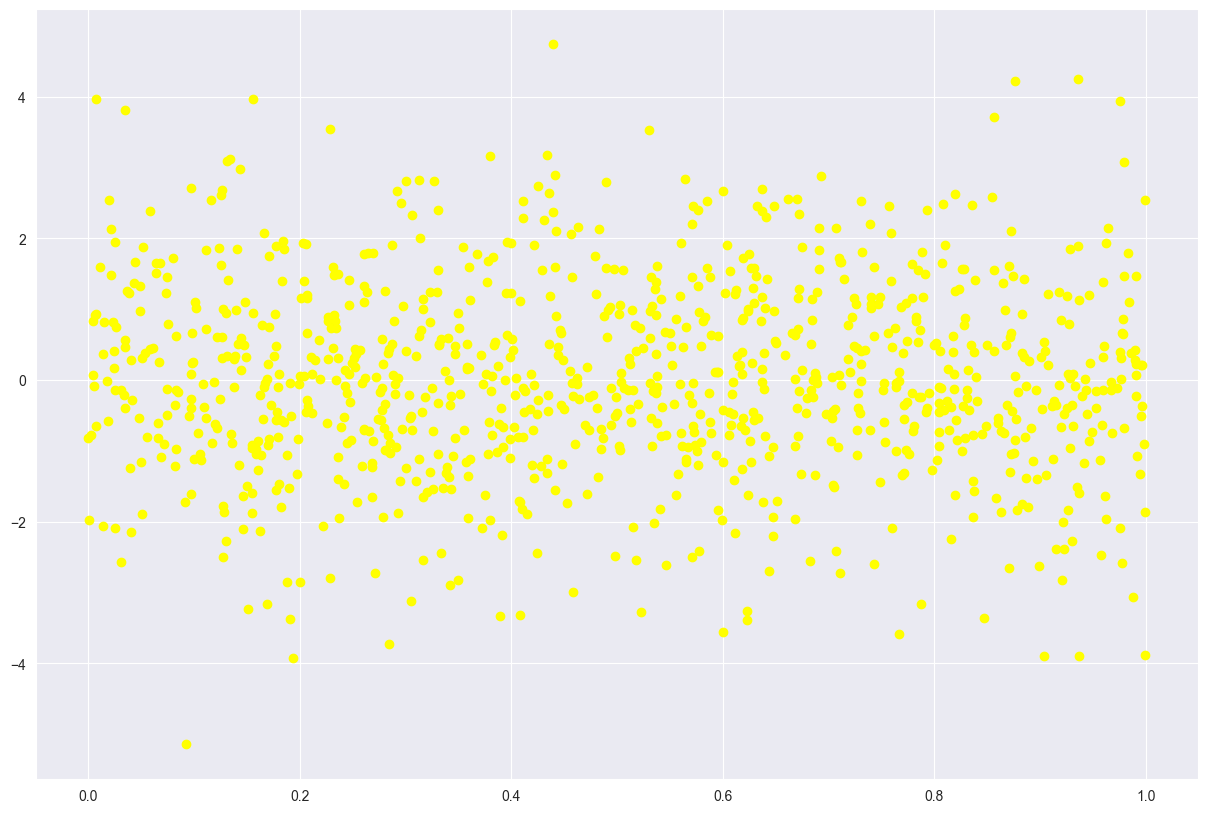

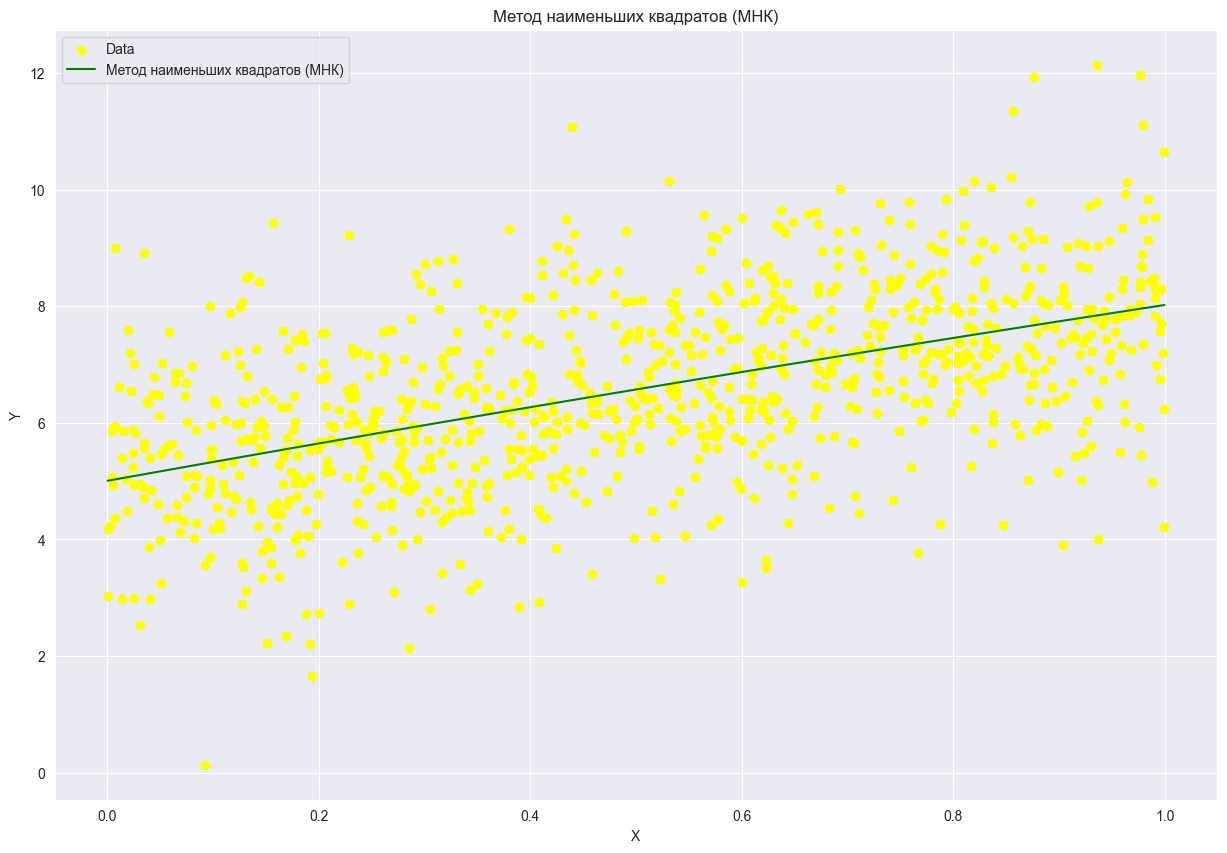

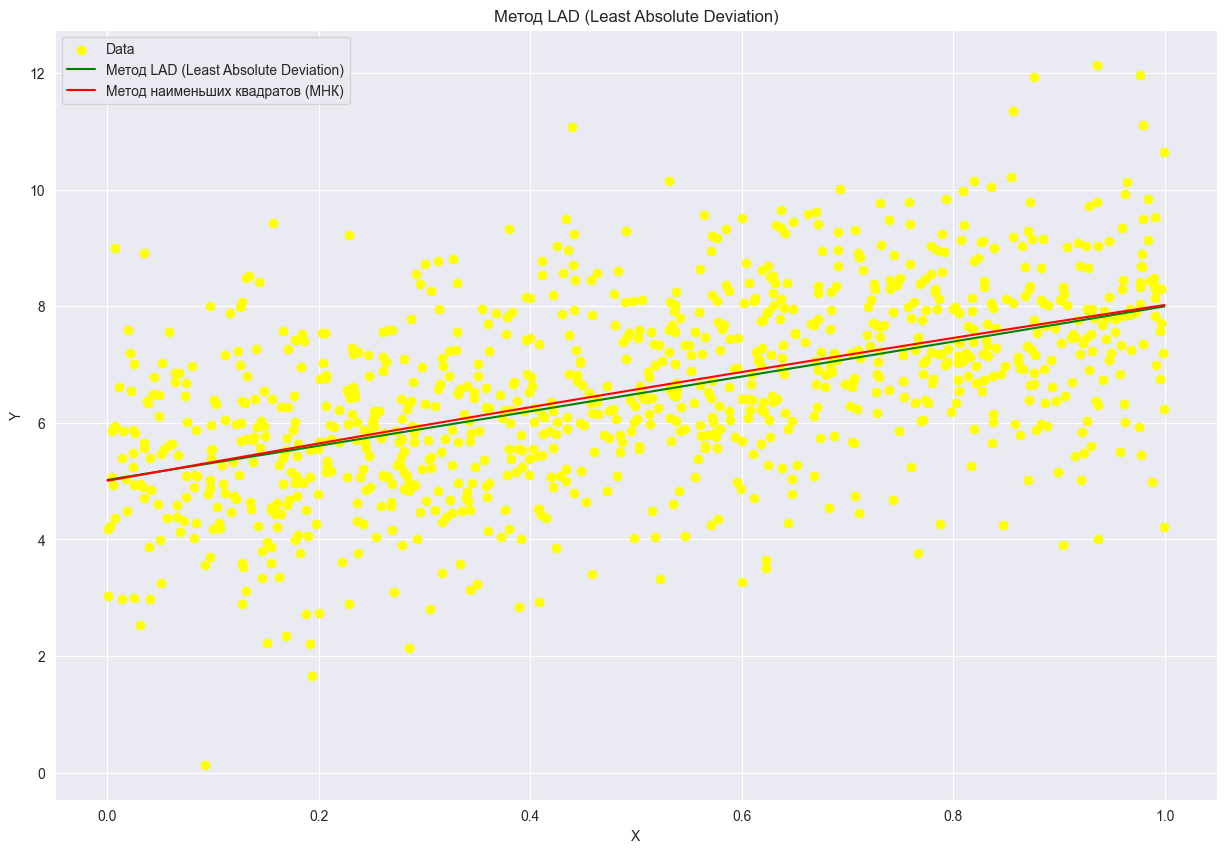

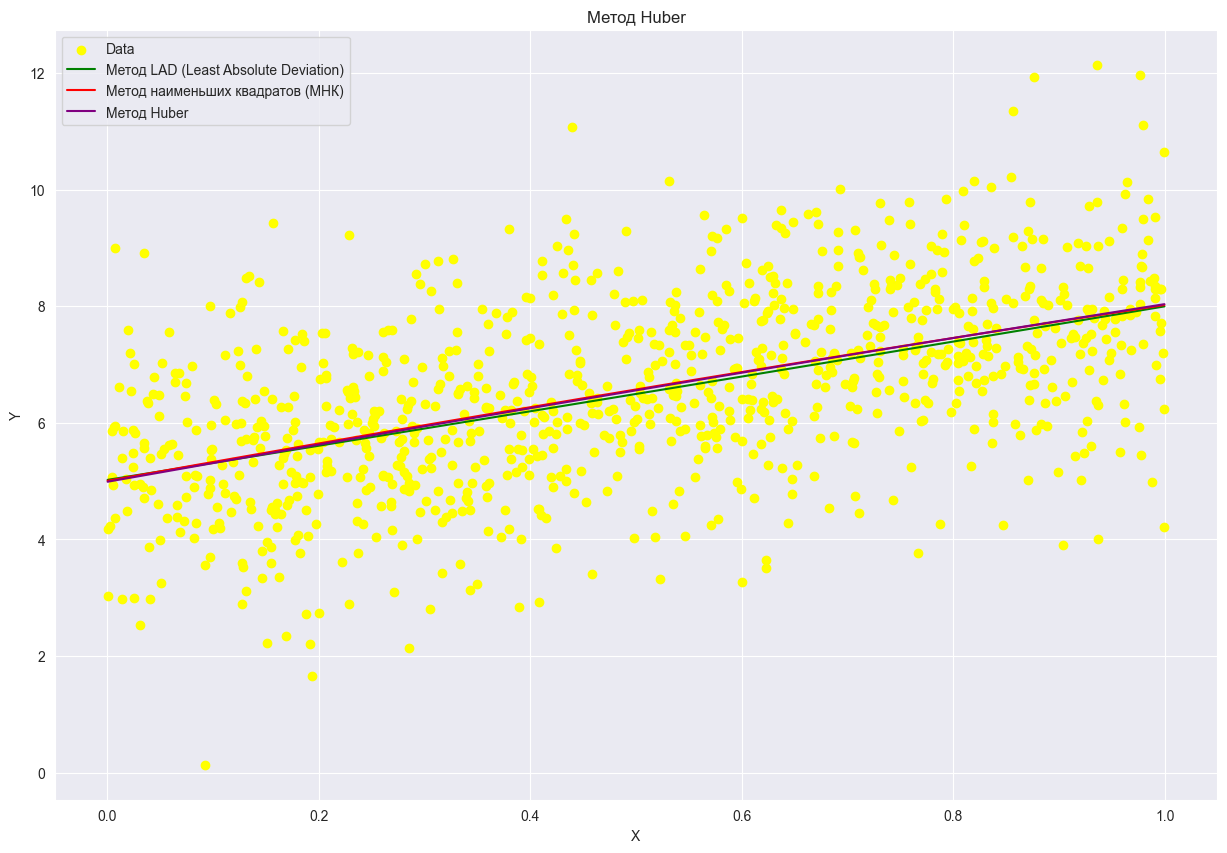

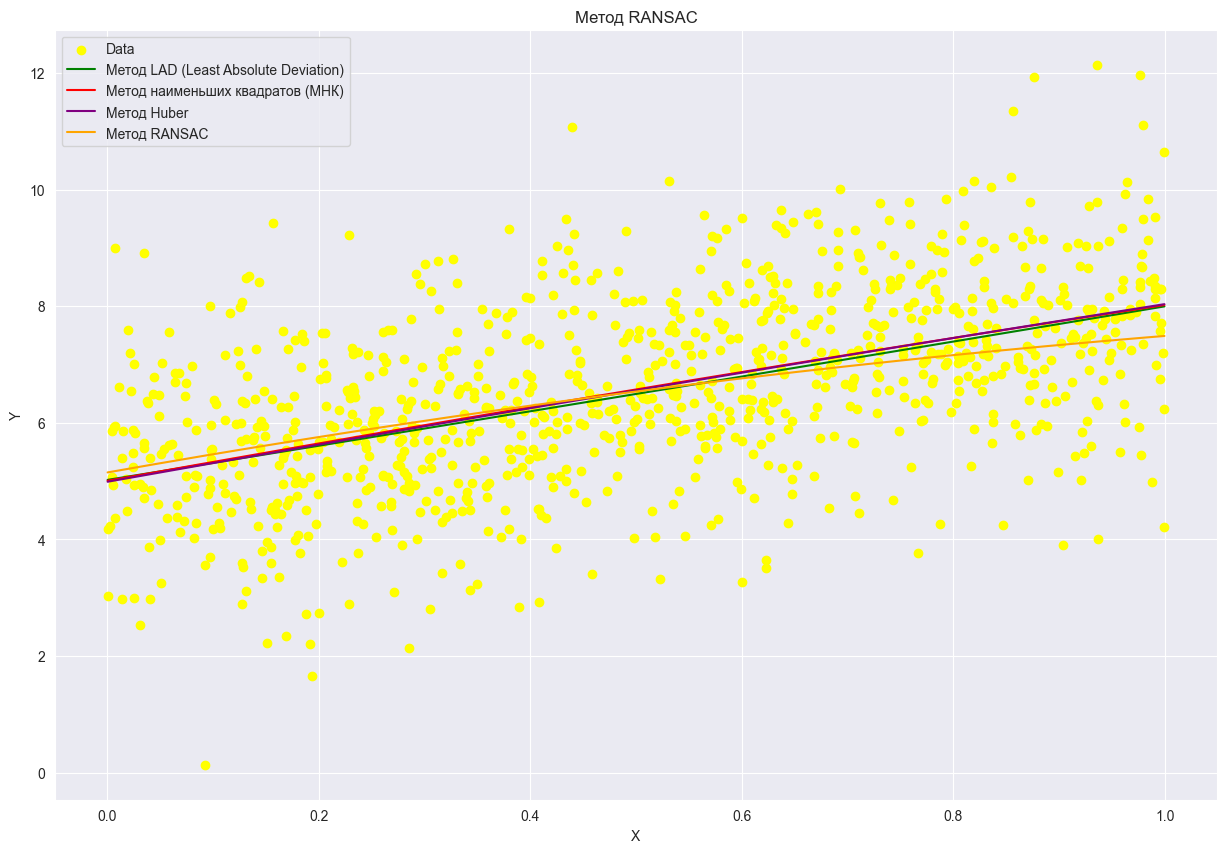

Results:
{'Linear Regression MSE': 1.9026871680232846, 'Huber Regression MSE': 1.9029070207728778, 'RANSAC Regression MSE': 1.9495798089311187, 'Least Absolute Deviation MSE': 1.9061555669446837}
Best method is Linear Regression MSE with MSE: 1.9026871680232846


In [16]:
from scipy.interpolate import splrep, splev
import statsmodels
import pc
import statsmodels.api as sm
import statsmodels.stats.api as ssa
import scipy
import numpy as np
import random
import sklearn
import pandas as pd
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt
import math
from scipy.stats import bws_test
from sklearn import linear_model 
import csv
from sklearn.linear_model import LinearRegression, HuberRegressor, RANSACRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.regression.quantile_regression import QuantReg


n = 1000
X0 = np.ones(n)
X = np.random.uniform(0,1, n)
X.sort()
eps = np.zeros(n)
for i in range(n):
    choice = np.random.choice([0, 1, -1], p=[0.8, 0.1, 0.1])
    if choice == 0:
        eps[i] = np.random.normal(0, 1)
    elif choice == 1:
        eps[i] = np.random.normal(2, 1)
    else:
        eps[i] = np.random.normal(-2, 1)


Y = 0.1 * X**2 + 3*X + 5 + eps

# Построение квадратичной модели
X_sq = np.vstack([X0, X, X**2]).T

# Метод наименьших квадратов (МНК)
lr = LinearRegression()
lr_fit = lr.fit(X_sq, Y)
lr_pred = lr.predict(X_sq)
lr_mse = mean_squared_error(Y, lr_pred)

plt.figure(figsize=(15, 10))
plt.scatter(X, eps, color='yellow', label='Data')
plt.show()


plt.figure(figsize=(15, 10))
plt.scatter(X, Y, color='yellow', label='Data')
plt.plot(X, lr_pred, color='green', label='Метод наименьших квадратов (МНК)')
plt.title('Метод наименьших квадратов (МНК)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


# Метод LAD (Least Absolute Deviation)
qr = QuantReg(Y, X_sq)
qr_fit = qr.fit(q=0.5)  # q=0.5 соответствует медиане
lad_pred = qr_fit.predict(X_sq)
lad_mse = mean_squared_error(Y, lad_pred)


plt.figure(figsize=(15, 10))
plt.scatter(X, Y, color='yellow', label='Data')
plt.plot(X, lad_pred, color='green', label='Метод LAD (Least Absolute Deviation)')
plt.plot(X, lr_pred, color='red', label='Метод наименьших квадратов (МНК)')
plt.title('Метод LAD (Least Absolute Deviation)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Метод Huber
huber = HuberRegressor()
huber.fit(X_sq, Y)
huber_pred = huber.predict(X_sq)
huber_mse = mean_squared_error(Y, huber_pred)

plt.figure(figsize=(15, 10))
plt.scatter(X, Y, color='yellow', label='Data')
plt.plot(X, lad_pred, color='green', label='Метод LAD (Least Absolute Deviation)')
plt.plot(X, lr_pred, color='red', label='Метод наименьших квадратов (МНК)')
plt.plot(X, huber_pred, color='purple', label='Метод Huber')
plt.title('Метод Huber')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Метод RANSAC
ransac = RANSACRegressor()
ransac.fit(X_sq, Y)
ransac_pred = ransac.predict(X_sq)
ransac_mse = mean_squared_error(Y, ransac_pred)

plt.figure(figsize=(15, 10))
plt.scatter(X, Y, color='yellow', label='Data')
plt.plot(X, lad_pred, color='green', label='Метод LAD (Least Absolute Deviation)')
plt.plot(X, lr_pred, color='red', label='Метод наименьших квадратов (МНК)')
plt.plot(X, huber_pred, color='purple', label='Метод Huber')
plt.plot(X, ransac_pred, color='orange', label='Метод RANSAC')
plt.title('Метод RANSAC')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()



# Выбор лучшего метода
methods_results = {
    'Linear Regression MSE': lr_mse,
    'Huber Regression MSE': huber_mse,
    'RANSAC Regression MSE': ransac_mse,
    'Least Absolute Deviation MSE': lad_mse
}

best_method = min(methods_results, key=methods_results.get)
best_mse = methods_results[best_method]

print("Results:")
print(methods_results)
print(f"Best method is {best_method} with MSE: {best_mse}")


# Задача№2

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      998
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -222.75
Date:                Fri, 12 Apr 2024   Deviance:                       297.46
Time:                        12:18:13   Pearson chi2:                     815.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1361
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9728      0.295    -13.465      0.0

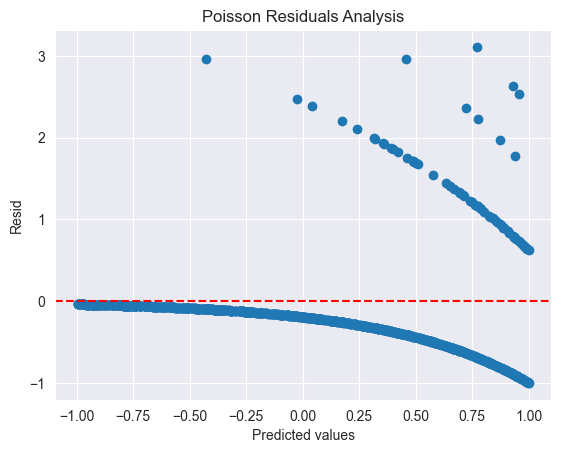

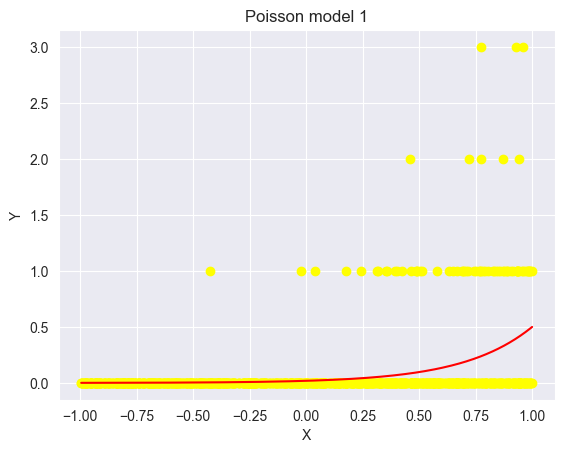

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      998
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -345.68
Date:                Fri, 12 Apr 2024   Deviance:                       420.48
Time:                        12:18:13   Pearson chi2:                 1.05e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3508
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0141      0.274    -14.654      0.0

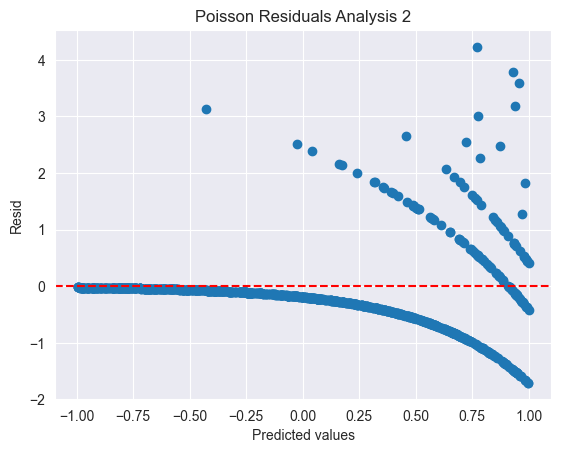

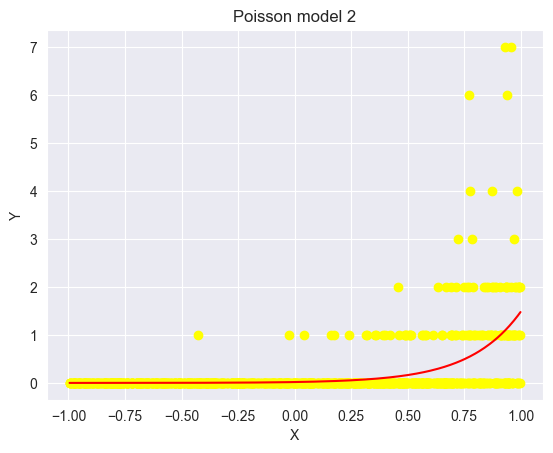

In [33]:
n = 1000
x0 = np.ones_like(n)
x = np.random.uniform(-1, 1, n)
x.sort()
eps = np.random.normal(0, 1, n)
y1 = np.round(np.exp(2*x - 3 + eps)).astype(int)
y2 = np.round(np.exp(x**2 + 2*x - 3 + eps)).astype(int)

x_const = sm.add_constant(x)
poisson_model = sm.GLM(y1, x_const, family=sm.families.Poisson()).fit()
print(poisson_model.summary())


residuals = poisson_model.resid_deviance
plt.scatter(x, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Resid')
plt.title('Poisson Residuals Analysis')
plt.show()

plt.scatter(x, y1, color='yellow', label='data points')
plt.plot(x, poisson_model.predict(x_const), color='r', label='model poiss1')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Poisson model 1')
plt.show()

poisson_model = sm.GLM(y2, x_const, family=sm.families.Poisson()).fit()
print(poisson_model.summary())

residuals = poisson_model.resid_deviance
plt.scatter(x, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Resid')
plt.title('Poisson Residuals Analysis 2')
plt.show()

plt.scatter(x, y2, color='yellow', label='data points')
plt.plot(x, poisson_model.predict(x_const), color='r', label='model poiss2')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Poisson model 2')
plt.show()


# №3 Постройте логистическую модель для прогноза выживаемости на Титанике на основе файла titanic- train. Какая получилась точность прогноза на данных titanic-test? Сравните с тривиальным прогнозом, предсказывающим всем утонуть.

/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_1403/3958259663.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_1403/3958259663.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['Sex'] = X1['Sex'].map({'male': 0, 'female': 1})
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_1403/3958259663.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

Survived
0    549
1    342
Name: count, dtype: int64
Точность прогноза на данных titanic-train: 0.8100558659217877
Точность прогноза на данных titanic-test: 0.9642857142857143
Точность прогноза модели на данных test проверяя train: 0.7991021324354658
Точность тривиального прогноза на данных titanic-train (предсказывающий всем утонуть): 0.6267942583732058
Точность тривиального прогноза на данных titanic-test (предсказывающий всем утонуть): 0.638755980861244


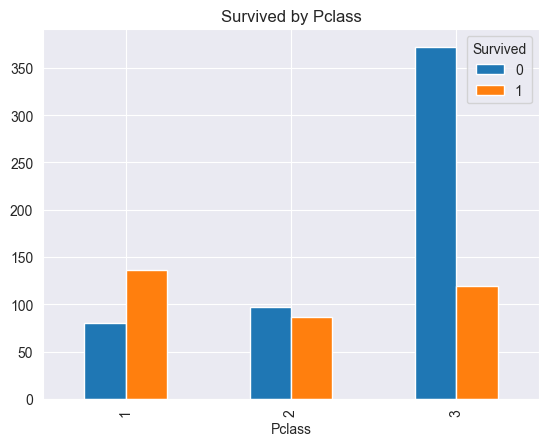

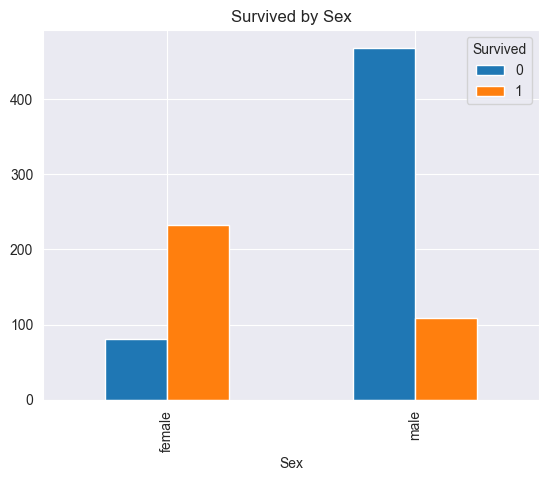

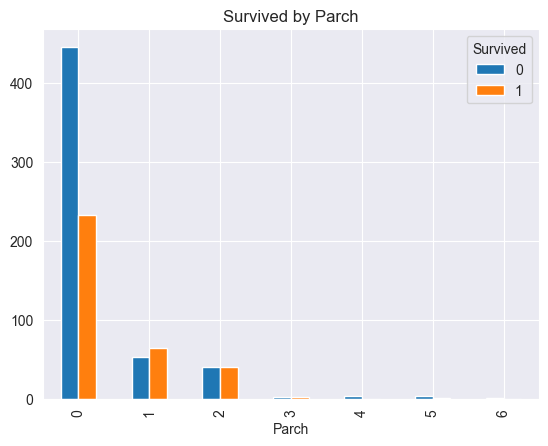

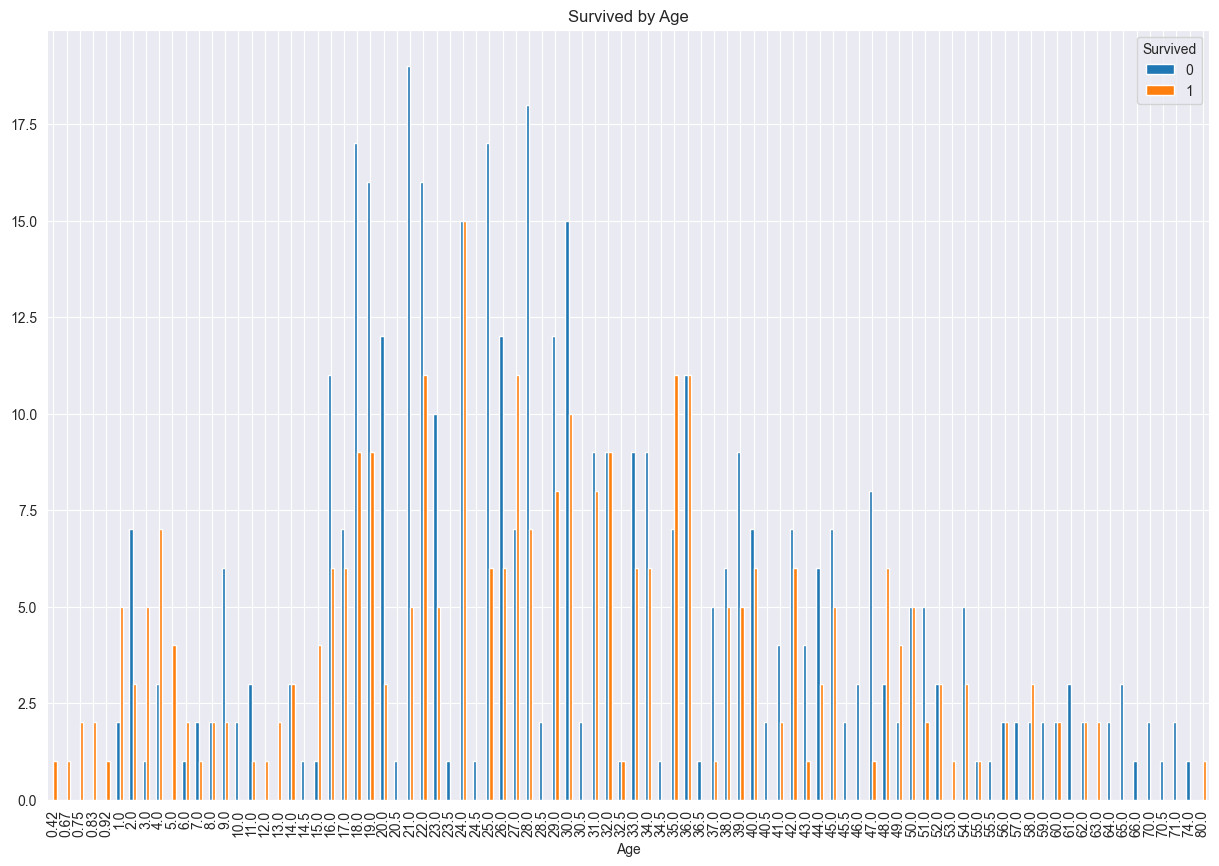

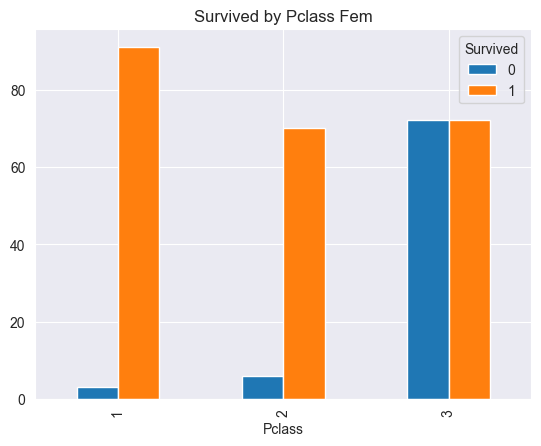

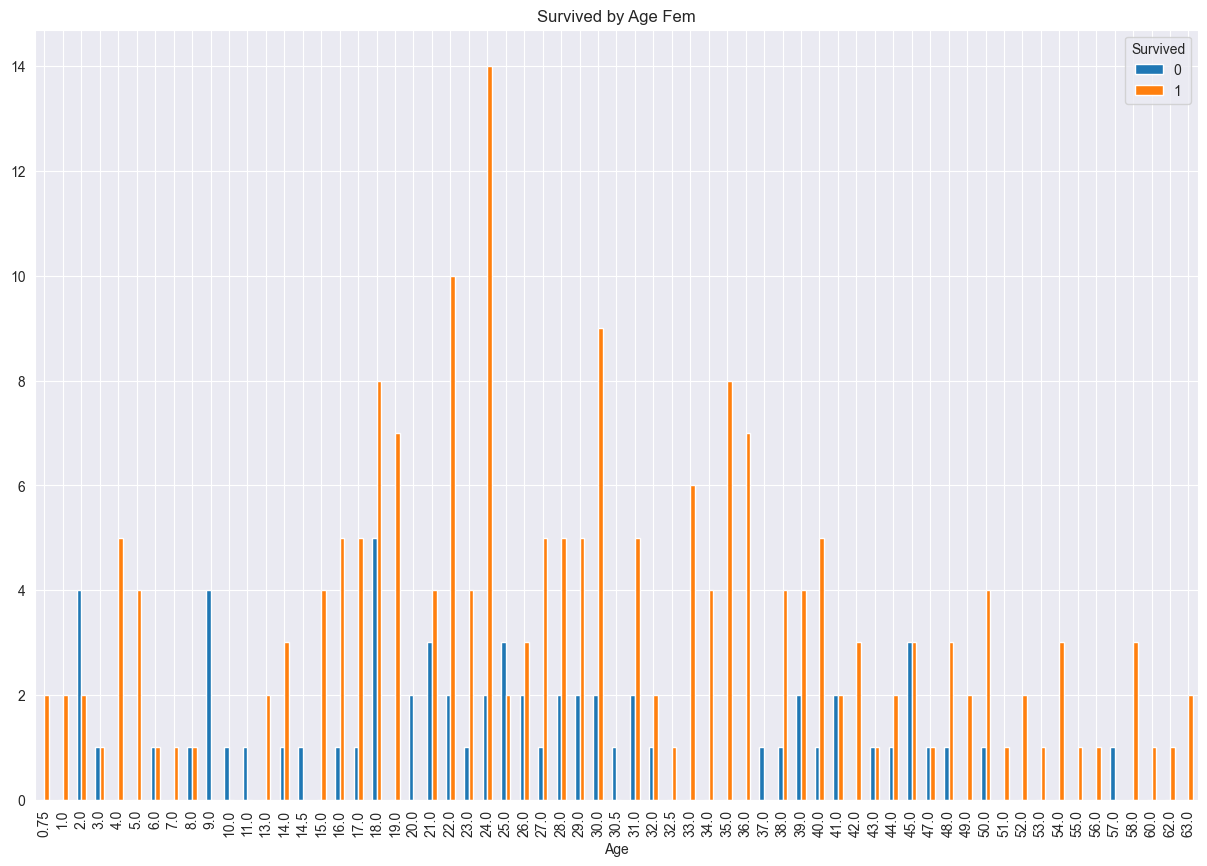

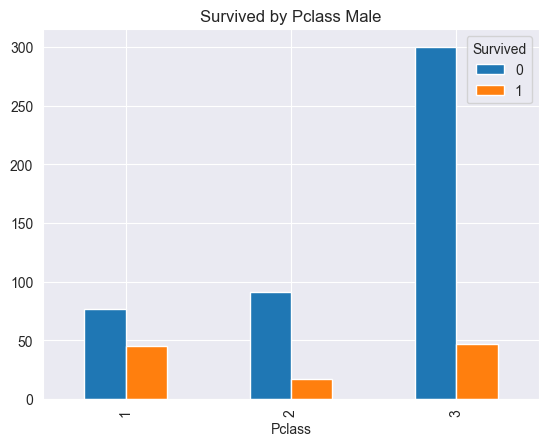

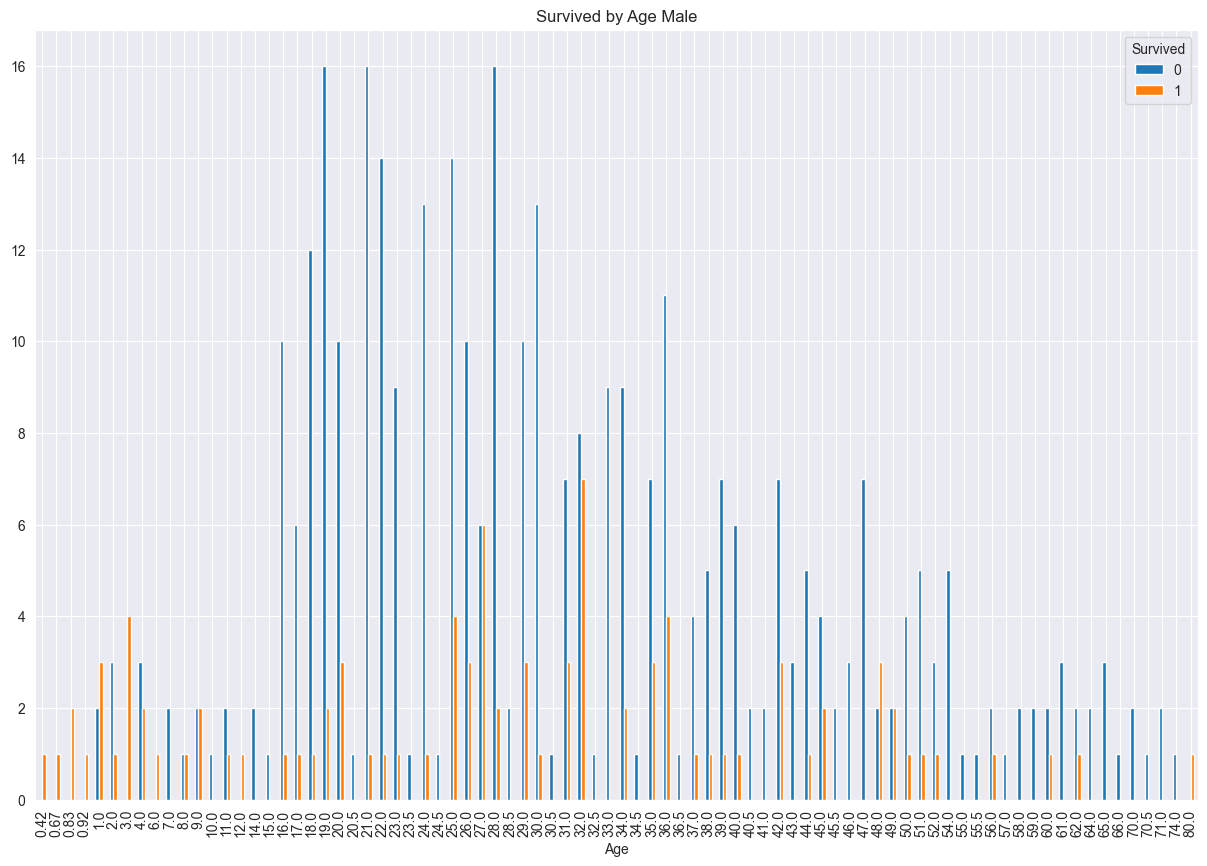

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# 
# titanic_train = pd.read_csv('titanic-train.csv')
# test_data = pd.read_csv('titanic-test.csv')
# 
# 
# 
# X = titanic_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
# X1 = test_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
# 
# X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})
# X1['Sex'] = X1['Sex'].map({'male': 0, 'female': 1})
# 
# X["Embarked"] = X["Embarked"].map({'S': 2, 'Q': 1, 'C' : 0})
# X1["Embarked"] = X1["Embarked"].map({'S': 2, 'Q': 1, 'C' : 0})
# 
# X = X.fillna(X.mean())
# X1 = X1.fillna(X1.mean())
# y = titanic_train['Survived']
# y1 = test_data['Survived']
# # tmp = titanic_train
# # tmp = tmp.drop(columns = ['PassengerId','Name', 'Ticket', 'Cabin', 'Embarked'])
# # tmp.head()
# # tmp.groupby('Survived').mean()
# 
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# X_test, X_val_test, y_test, y_val_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
# 
# 
# model = LogisticRegression()
# model.fit(X_train, y_train)
# 
# y_pred = model.predict(X_val_test)
# 
# accuracy = accuracy_score(y_val, y_pred)
# print(f'Точность прогноза на данных titanic-test: {accuracy}')
# 
# trivial_prediction = [0] * len(y_val)
# trivial_accuracy = accuracy_score(y_val, trivial_prediction)
# print(f'Точность тривиального прогноза (предсказывающий всем утонуть): {trivial_accuracy}')

titanic_train = pd.read_csv('titanic-train.csv')
test_data = pd.read_csv('titanic-test.csv')



X = titanic_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
X1 = test_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})
X1['Sex'] = X1['Sex'].map({'male': 0, 'female': 1})

X["Embarked"] = X["Embarked"].map({'S': 2, 'Q': 1, 'C' : 0})
X1["Embarked"] = X1["Embarked"].map({'S': 2, 'Q': 1, 'C' : 0})

X = X.fillna(X.mean())
X1 = X1.fillna(X1.mean()) #Хз пока чё дальше с тестом делать
y = titanic_train['Survived']

titanic_train.head()

def filter_by_value(df, column_name, value):
    filtered_df = df[df[column_name] == value]
    return filtered_df



# Фильтруем строки, где значение в столбце B равно 'apple'




# titanic_train.groupby('Survived').mean()
# print(titanic_train.groupby('Sex').mean())
print(titanic_train['Survived'].value_counts())
pd.crosstab(titanic_train.Pclass,titanic_train.Survived).plot(kind='bar', title='Survived by Pclass')
pd.crosstab(titanic_train.Sex,titanic_train.Survived).plot(kind='bar', title='Survived by Sex')
pd.crosstab(titanic_train.Parch,titanic_train.Survived).plot(kind='bar', title='Survived by Parch')
pd.crosstab(titanic_train.Age,titanic_train.Survived).plot(kind='bar', title='Survived by Age', figsize=(15, 10))
Fem = filter_by_value(titanic_train, 'Sex', 'female')
Male = filter_by_value(titanic_train, 'Sex', 'male')
pd.crosstab(Fem.Pclass,Fem.Survived).plot(kind='bar', title='Survived by Pclass Fem')
pd.crosstab(Fem.Age,Fem.Survived).plot(kind='bar', title='Survived by Age Fem', figsize=(15, 10))
pd.crosstab(Male.Pclass,Male.Survived).plot(kind='bar', title='Survived by Pclass Male')
pd.crosstab(Male.Age,Male.Survived).plot(kind='bar', title='Survived by Age Male', figsize=(15, 10))

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


reg = LogisticRegression().fit(X_train, y_train)

y_pred = reg.predict(X1)
y_pred1 = reg.predict(X_val)

accuracy = accuracy_score(y_val, y_pred1)
print(f'Точность прогноза на данных titanic-train: {accuracy}')

X_test, X_val_test, y_test, y_val_test = train_test_split(X1, y_pred, test_size=0.2, random_state=42)

reg1 = LogisticRegression().fit(X_test, y_test)
y_test_pred = reg1.predict(X_val_test)
y_test_pred1 = reg1.predict(X1)

accuracy = accuracy_score(y_val_test, y_test_pred)
print(f'Точность прогноза на данных titanic-test: {accuracy}')
accuracy = accuracy_score(y, reg1.predict(X))
print(f'Точность прогноза модели на данных test проверяя train: {accuracy}')


trivial_prediction = [0] * len(y_pred)
trivial_accuracy = accuracy_score(y_pred, trivial_prediction)
print(f'Точность тривиального прогноза на данных titanic-train (предсказывающий всем утонуть): {trivial_accuracy}')

trivial_prediction = [0] * len(y_test_pred1)
trivial_accuracy = accuracy_score(y_test_pred1, trivial_prediction)
print(f'Точность тривиального прогноза на данных titanic-test (предсказывающий всем утонуть): {trivial_accuracy}')


In [53]:
# Создаем исходный DataFrame
data = {'A': [1, 2, 3, 4],
        'B': ['apple', 'banana', 'apple', 'banana'],
        'C': [5, 6, 2, 4]}
df = pd.DataFrame(data)

def filter_by_value(df, column_name, value):
    filtered_df = df[df[column_name] == value]
    return filtered_df

# Задаем значение, по которому будем фильтровать
value_to_filter = 'apple'

# Фильтруем строки, где значение в столбце B равно 'apple'
filtered_data = filter_by_value(df, 'B', value_to_filter)

print(filtered_data)


   A      B  C
0  1  apple  5
2  3  apple  2
